## DIS BENCHMARK EXPERIMENT WITH 30 ITERATIONS 
### 1 message / millisecond
---

#### Loading Data

In [15]:
import pandas as pd
import os
import re
import numpy as np

def analyze_benchmark_metrics(sender_folder, receiver_folder):
    
    results = []
    pattern = re.compile(r'(dis|proto)-(sender|receiver)-metrics-(\d+)\.csv')
      
    # group files for iteration
    files = {}
    for folder, role in [(sender_folder, 'sender'), (receiver_folder, 'receiver')]:
        for filename in os.listdir(folder):
            match = pattern.match(filename)
            if match:
                protocol, file_role, iteration = match.group(1), match.group(2), int(match.group(3))
                files.setdefault(protocol, {}).setdefault(iteration, {})[file_role] = os.path.join(folder, filename)
    
    # process iteration
    for protocol in files:
        for iteration in sorted(files[protocol].keys()):
            if 'sender' not in files[protocol][iteration] or 'receiver' not in files[protocol][iteration]:
                continue
            
            # read files in iteration
            sender_df = pd.read_csv(files[protocol][iteration]['sender'])
            receiver_df = pd.read_csv(files[protocol][iteration]['receiver'])
            
            # encoding/deconding metrics
            encoding_time_mean = sender_df['Encoding_Time'].mean()
            encoding_time_std = sender_df['Encoding_Time'].std()
            decoding_time_mean = receiver_df['Decoding_Time'].mean()
            decoding_time_std = receiver_df['Decoding_Time'].std()
                        
            # iteration time in sec
            total_time = (receiver_df['Received_Time'].max() - sender_df['Sent_Time'].min()) / 1000
            
            # throughput
            throughput = len(sender_df) / total_time
            
            # message size
            message_size_mean = sender_df['Size_In_Bytes'].mean()
            message_size_std = sender_df['Size_In_Bytes'].std()
            
            # package loss
            packets_sent = len(sender_df)
            packets_received = len(receiver_df)
            packet_loss_percent = ((packets_sent - packets_received) / packets_sent * 100) if packets_sent > 0 else np.nan
            results.append({
                'Protocol': protocol.upper(),
                'Iteration': iteration,
                'Encoding_Time_Mean': encoding_time_mean,
                'Encoding_Time_Std': encoding_time_std,
                'Decoding_Time_Mean': decoding_time_mean,
                'Decoding_Time_Std': decoding_time_std,
                'Throughput': throughput,
                'Message_Size_Mean': message_size_mean,
                'Message_Size_Std': message_size_std,
                'Packet_Loss_Percent': packet_loss_percent,
                'Total_Time': total_time
            })
    
    # build dataframe
    result_df = pd.DataFrame(results)
    if not result_df.empty:
        result_df = result_df.sort_values(['Protocol', 'Iteration'])
        numeric_cols = [
            'Encoding_Time_Mean', 'Encoding_Time_Std', 'Decoding_Time_Mean', 'Decoding_Time_Std',
            'Throughput', 'Message_Size_Mean', 'Message_Size_Std',
            'Packet_Loss_Percent', 'Total_Time'
        ]
        result_df[numeric_cols] = result_df[numeric_cols].round(4)
    
    return result_df

#### Checking Raw Data

In [16]:
dis_benchmark = analyze_benchmark_metrics("../src/data/dis/sender", "../src/data/dis/receiver")
dis_benchmark

,Protocol,Iteration,Encoding_Time_Mean,Encoding_Time_Std,Decoding_Time_Mean,Decoding_Time_Std,Throughput,Message_Size_Mean,Message_Size_Std,Packet_Loss_Percent,Total_Time
0,DIS,1,0.0584,0.0894,0.0861,0.0615,79.0760,1280.0,0.0,0.0222,227.6291
1,DIS,2,0.0581,0.1270,0.0724,0.0603,79.2161,1280.0,0.0,0.0222,227.2264
2,DIS,3,0.0571,0.1012,0.0754,0.0634,78.4283,1280.0,0.0,0.0222,229.5091
3,DIS,4,0.0562,0.1176,0.0814,0.0618,78.9461,1280.0,0.0,0.0167,228.0035
4,DIS,5,0.0567,0.0785,0.0576,0.0507,79.3199,1280.0,0.0,0.0167,226.9292
5,DIS,6,0.0574,0.1289,0.0594,0.0595,78.3659,1280.0,0.0,0.0222,229.6917
6,DIS,7,0.0566,0.0787,0.0672,0.0486,78.2548,1280.0,0.0,0.0333,230.0180
7,DIS,8,0.0582,0.0839,0.0686,0.0468,78.3869,1280.0,0.0,0.0222,229.6302
8,DIS,9,0.0569,0.1059,0.0551,0.0550,78.0975,1280.0,0.0,0.0222,230.4812
9,DIS,10,0.0569,0.0886,0.0648,0.0451,78.2456,1280.0,0.0,0.0222,230.0450


In [17]:
proto_benchmark = analyze_benchmark_metrics("../src/data/proto/sender", "../src/data/proto/receiver")
proto_benchmark

,Protocol,Iteration,Encoding_Time_Mean,Encoding_Time_Std,Decoding_Time_Mean,Decoding_Time_Std,Throughput,Message_Size_Mean,Message_Size_Std,Packet_Loss_Percent,Total_Time
0,PROTO,1,0.0565,0.1329,0.0263,0.1883,78.5291,166.0000,0.0000,0.0222,229.2144
1,PROTO,2,0.0553,0.1394,0.0268,0.0674,77.9233,166.0000,0.0000,0.0222,230.9964
2,PROTO,3,0.0551,0.1054,0.0270,0.0908,78.3997,166.0000,0.0000,0.0333,229.5926
3,PROTO,4,0.0536,0.0965,0.0281,0.0935,78.9978,166.0000,0.0000,0.0167,227.8544
4,PROTO,5,0.0538,0.0951,0.0278,0.0959,79.2389,166.0000,0.0000,0.0167,227.1611
5,PROTO,6,0.0541,0.1152,0.0277,0.0766,79.4712,165.1341,0.3850,0.0222,226.4972
6,PROTO,7,0.0561,0.1318,0.0267,0.0645,80.0002,165.0000,0.0000,0.0222,224.9996
7,PROTO,8,0.0556,0.0952,0.0263,0.1129,79.8258,165.9401,0.2374,0.0222,225.4911
8,PROTO,9,0.0554,0.0867,0.0194,0.1223,80.8182,166.0000,0.0000,0.0222,222.7220
9,PROTO,10,0.0564,0.0891,0.0189,0.0571,80.8268,166.0000,0.0000,0.0222,222.6983


#### Comparing Throughput, Message Size, Packet Loss, And Duration

In [18]:
# throughout
dis_throughput_mean = dis_benchmark['Throughput'].mean()
proto_throughput_mean = proto_benchmark['Throughput'].mean()

# message size
dis_message_size_mean = dis_benchmark['Message_Size_Mean'].mean()
proto_message_size_mean = proto_benchmark['Message_Size_Mean'].mean()

# packet loss
dis_package_loss_mean = dis_benchmark['Packet_Loss_Percent'].mean()
proto_package_loss_mean = proto_benchmark['Packet_Loss_Percent'].mean()

# duration
dis_duration_mean = dis_benchmark['Total_Time'].mean()
proto_duration_mean = proto_benchmark['Total_Time'].mean()

# results table
experiment_data = {
    'Protocol': ['DIS', 'PROTO', 'Diff (to DIS)'],
    'Throughput (msg/sec)': [dis_throughput_mean, proto_throughput_mean, f"{((1 - (dis_throughput_mean / proto_throughput_mean)) * 100):.2f}%"],
    'Message Size (bytes)': [dis_message_size_mean, f"{(proto_message_size_mean):.1f}", f"{(dis_message_size_mean / proto_message_size_mean):.2f}x"],
    'Packet Loss (%)': [dis_package_loss_mean, proto_package_loss_mean, f"{((1 - (dis_package_loss_mean / proto_package_loss_mean)) * 100):.2f}%"],
    'Experiment Duration (sec)': [dis_duration_mean, proto_duration_mean, f"{((1 - (dis_duration_mean / proto_duration_mean)) * 100):.2f}%"]
}
experiment_df = pd.DataFrame(experiment_data)

# display table
experiment_df

,Protocol,Throughput (msg/sec),Message Size (bytes),Packet Loss (%),Experiment Duration (sec)
0,DIS,79.223397,1280.0,0.021473,227.230157
1,PROTO,79.33903,165.9,0.28351,226.902973
2,Diff (to DIS),0.15%,7.72x,92.43%,-0.14%


#### Comparing Encoding And Decoding Time

In [19]:
# encoding time
dis_encoding_time_mean = dis_benchmark['Encoding_Time_Mean'].mean()
dis_encoding_time_std = dis_benchmark['Encoding_Time_Std'].mean()
proto_encoding_time_mean = proto_benchmark['Encoding_Time_Mean'].mean()
proto_encoding_time_std = proto_benchmark['Encoding_Time_Std'].mean()

# decoding time
dis_decoding_time_mean = dis_benchmark['Decoding_Time_Mean'].mean()
dis_decoding_time_std = dis_benchmark['Decoding_Time_Std'].mean()
proto_decoding_time_mean = proto_benchmark['Decoding_Time_Mean'].mean()
proto_decoding_time_std = proto_benchmark['Decoding_Time_Std'].mean()

# results table
endecoding_data = {
  'Protocol': ['DIS', 'Protobuf', 'Diff (%)'],
  'Encoding Time (Mean)': [dis_encoding_time_mean, proto_encoding_time_mean, f"{((1 - (dis_encoding_time_mean / proto_encoding_time_mean)) * 100):.2f}%"],
  'Encoding Time (Std)': [dis_encoding_time_std, proto_encoding_time_std, f"{((1 - (dis_encoding_time_std / proto_encoding_time_std)) * 100):.2f}%"],
  'Decoding Time (Mean)': [dis_decoding_time_mean, proto_decoding_time_mean, f"{((1 - (dis_decoding_time_mean / proto_decoding_time_mean)) * 100):.2f}%"],
  'Decoding Time (Std)': [dis_decoding_time_std, proto_decoding_time_std, f"{((1 - (dis_decoding_time_std / proto_decoding_time_std)) * 100):.2f}%"]
}
endecoding_data_df = pd.DataFrame(endecoding_data)

# display table
endecoding_data_df

,Protocol,Encoding Time (Mean),Encoding Time (Std),Decoding Time (Mean),Decoding Time (Std)
0,DIS,0.058137,0.07755,0.07237,0.053973
1,Protobuf,0.055243,0.088727,0.025487,0.08503
2,Diff (%),-5.24%,12.60%,-183.95%,36.52%


#### Comparing Encoding, Decoding Time And Message Size: Graphics

In [20]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# bars = ax[0].bar(['DIS', 'Protobuf'], [dis_message_size_mean, proto_message_size_mean], color=['blue', 'red'], label="Size", alpha=0.55)
# ax[0].set_title("Mean ESPDU Size")
# ax[0].bar_label(bars, fmt='%.0f')

# bars = ax[1].bar(['DIS', 'Protobuf'], [dis_encoding_time_mean, proto_encoding_time_mean], color=['blue', 'red'], label="Time", alpha=0.55)
# ax[1].set_title("Mean Encoding Time (High-rate)")
# ax[1].bar_label(bars, fmt='%.2f')

# bars = ax[2].bar(['DIS', 'Protobuf'], [dis_decoding_time_mean, proto_decoding_time_mean], color=['blue', 'red'], label="Time", alpha=0.55)
# ax[2].set_title("Mean Decoding Time (High-rate)")
# ax[2].bar_label(bars, fmt='%.2f')

# plt.tight_layout()
# plt.show()

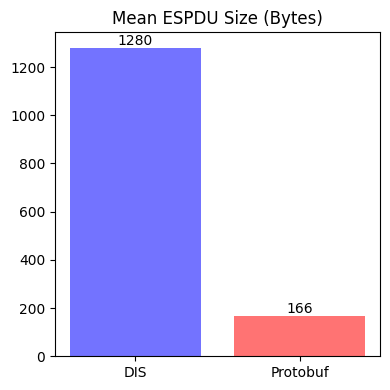

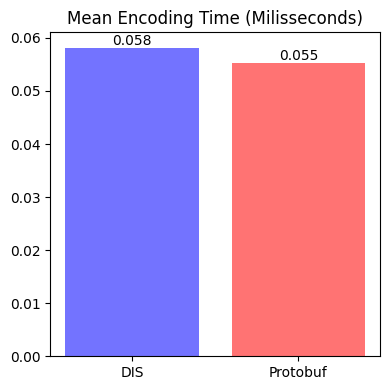

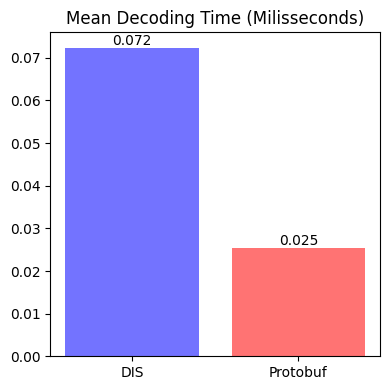

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Gráfico 1: Mean ESPDU Size
fig1, ax1 = plt.subplots(figsize=(4, 4))
bars1 = ax1.bar(['DIS', 'Protobuf'], [dis_message_size_mean, proto_message_size_mean], color=['blue', 'red'], label="Size", alpha=0.55)
ax1.set_title("Mean ESPDU Size (Bytes)")
ax1.bar_label(bars1, fmt='%.0f')
plt.tight_layout()
plt.show()

# Gráfico 2: Mean Encoding Time (High-rate)
fig2, ax2 = plt.subplots(figsize=(4, 4))
bars2 = ax2.bar(['DIS', 'Protobuf'], [dis_encoding_time_mean, proto_encoding_time_mean], color=['blue', 'red'], label="Time", alpha=0.55)
ax2.set_title("Mean Encoding Time (Milisseconds)")
ax2.bar_label(bars2, fmt='%.3f')
plt.tight_layout()
plt.show()

# Gráfico 3: Mean Decoding Time (High-rate)
fig3, ax3 = plt.subplots(figsize=(4, 4))
bars3 = ax3.bar(['DIS', 'Protobuf'], [dis_decoding_time_mean, proto_decoding_time_mean], color=['blue', 'red'], label="Time", alpha=0.55)
ax3.set_title("Mean Decoding Time (Milisseconds)")
ax3.bar_label(bars3, fmt='%.3f')
plt.tight_layout()
plt.show()